## Option 1: Computational Approach

Try coding up your own simulation of a two-player iterated Prisoner’s Dilemma. Feel free to
use Python or R — whichever you prefer. This question is open-ended, but your work should
contain some of the following elements:

- Try a few strategies that we learned against each other. Some examples you might consider
include: tit-for-tat, grim trigger, intermediate punishment strategies, always cooperate,
always defect, probabilistic strategies.
- Produce some informative plots or summary statistics about the outcomes of your simulation. (You can draw on the plots from papers we’ve read for inspiration.) Some information
you might convey includes: which strategies get the highest total payoffs (against which?)?
When can cooperation be sustained?
- Be sure to reproduce your payoff matrix and all other key decisions you made in your
write-up. Think carefully about the number of repetitions of the game you want to do,
and why.
- If you’d rather experiment with an existing approach rather than writing your own code, feel
free to play around with the axelrod Python library: https://github.com/Axelrod-Python/
Axelrod. This has built-in tools to create head-to-head matches, tournaments over multiple
strategies, and visualizations.

Optional extensions:
- Incorporate discounting of future utilities
- Incorporate some sort of learning or adaptation (for instance, if you want to play around
with reinforcement learning, see: https://github.com/Axelrod-Python/axelrod-dojo)
Briefly discuss your results.

In [2]:
#Try using Axelrod
import axelrod as axl

#Check for player types
players_list = axl.strategies
print(len(players_list), "players available")

#Example
players_ex = [axl.Cooperator(), axl.Alternator()]

match = axl.Match(players = players_ex, turns=10)

match.play()
print(match.sparklines())


243 players available
██████████
█ █ █ █ █ 


In [3]:
#Code to get match results

match.scores()

match.final_score()

match.final_score_per_turn()

match.winner()

match.cooperation()  # The count of cooperations

match.normalised_cooperation()  # The count of cooperations per turn


(1.0, 0.5)

Strategies covered in class to test:

- Grim trigger
- Tit-for-Tat
- Intermediate punishment strategies
    - Similar to grim trigger: k-Grim Trigger
        - Cooperate until your opponent defects. If
    your opponent defects, do not cooperate for the next k periods but
    then return to cooperation; if you defect, do not cooperate for the
    next k periods but then return to cooperation. Once you have
    returned to cooperation, cooperate until a defection occurs.
    - Similar to tit-for-tat: 
        - Cooperate until your opponent defects. If your
    opponent defects, do not cooperate for k periods. If she cooperates
    in any of the k periods, return to cooperation, ending the
    punishment phase. If she fails to cooperate in any period of the
    punishment phase, then the punishment phase starts over i.e. don’t
    cooperate for k more periods. If your own failure to cooperate
    caused the punishment phase then cooperate during the punishment
    phase.
- Always cooperate
- Always defect
- Probabilistic stragies (ie. 0.7 chance of cooperation)



Things to vary:

- Finite vs infinite games


For finite games:

If the stage game G has a unique Nash equilibrium then, for any
finite T , the repeated game G (T ) has a unique subgame-perfect
outcome: the Nash equilibrium of G is played in every stage.


For infinite games:

In the infinitely repeated game G (∞,δ), each subgame beginning
at stage t + 1 is identical to the original game G (∞,δ). As in
the finite-horizon case, there are as many subgames beginning at
stage t + 1 of G (∞,δ) as there are possible histories of play
through stage t.

A Nash equilibrium is subgame-perfect if the players’ strategies
constitute a Nash equilibrium in every subgame.

- simulate by using δ discount factor - and a repeated game that ends after a random number of repitions. 

Consider also:
- discount rates -> for infinitely repeated games
- The Folk Theorem:
    - For every feasible and individually rational payoﬀ vector v there is
a vector of discount rates δ0 (i.e. one δ0 for each player) such
i
that the payoﬀ vector v occurs in a Nash equilibrium of the
repeated game if δi ≥ δ0 for all i.


Example visualisation: https://www.nature.com/articles/s41562-025-02172-y/figures/3

Classic Prisoner's Dilemma

In [4]:
## Classic Prisoner's Dilemma

players = [
    axl.Cooperator(),
    axl.Defector(),
    axl.TitForTat(),
    axl.Random(),
]

tournament = axl.Tournament(players, turns=200, repetitions=5)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 138.07it/s]


Ranking of strategies:
['Defector', 'Random: 0.5', 'Tit For Tat', 'Cooperator']


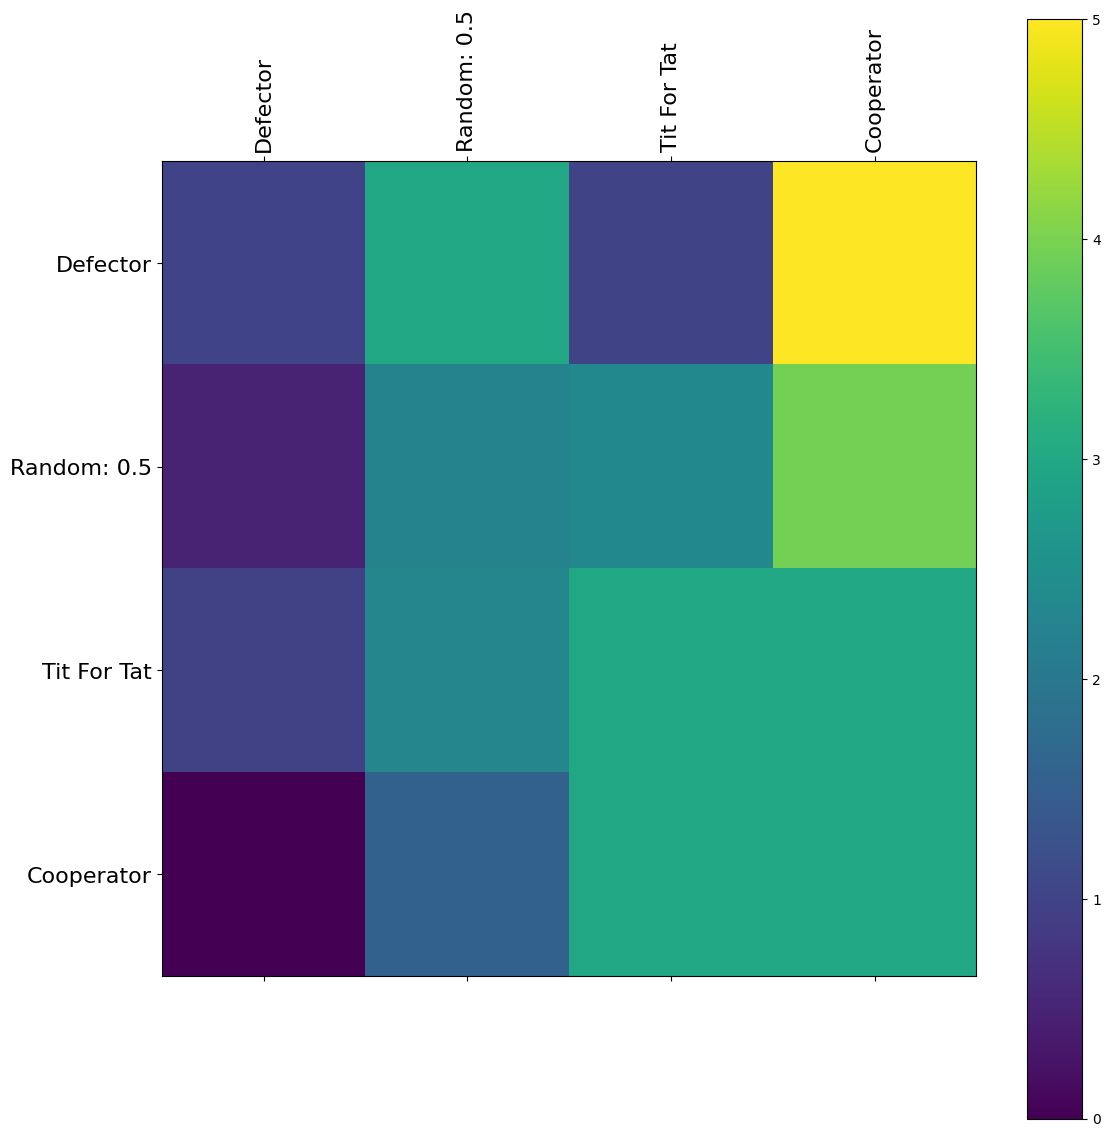

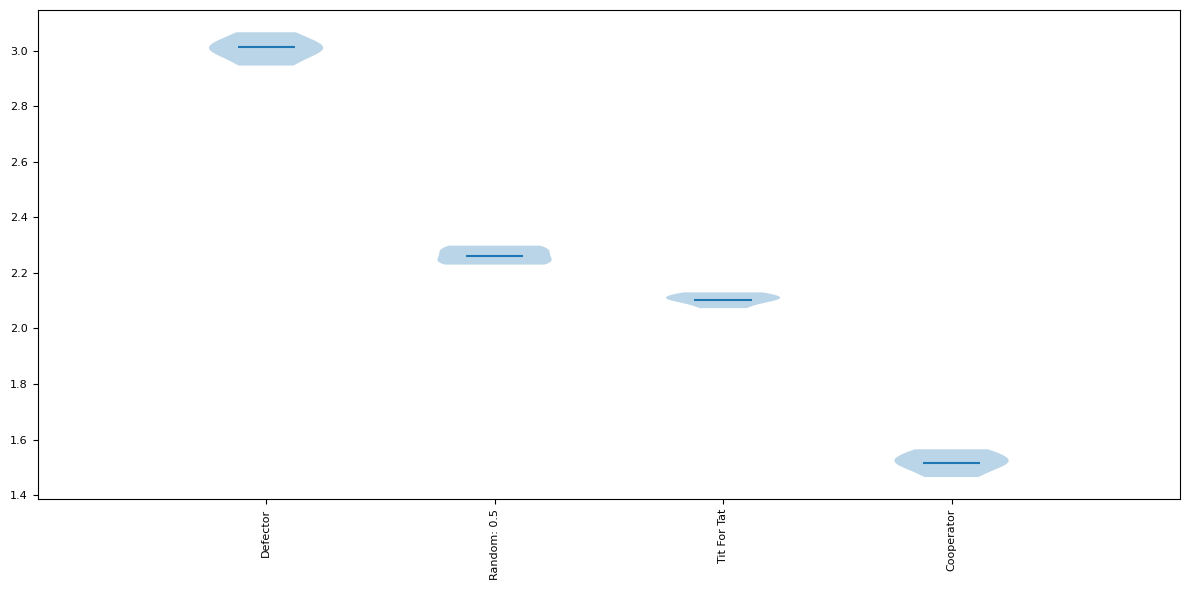

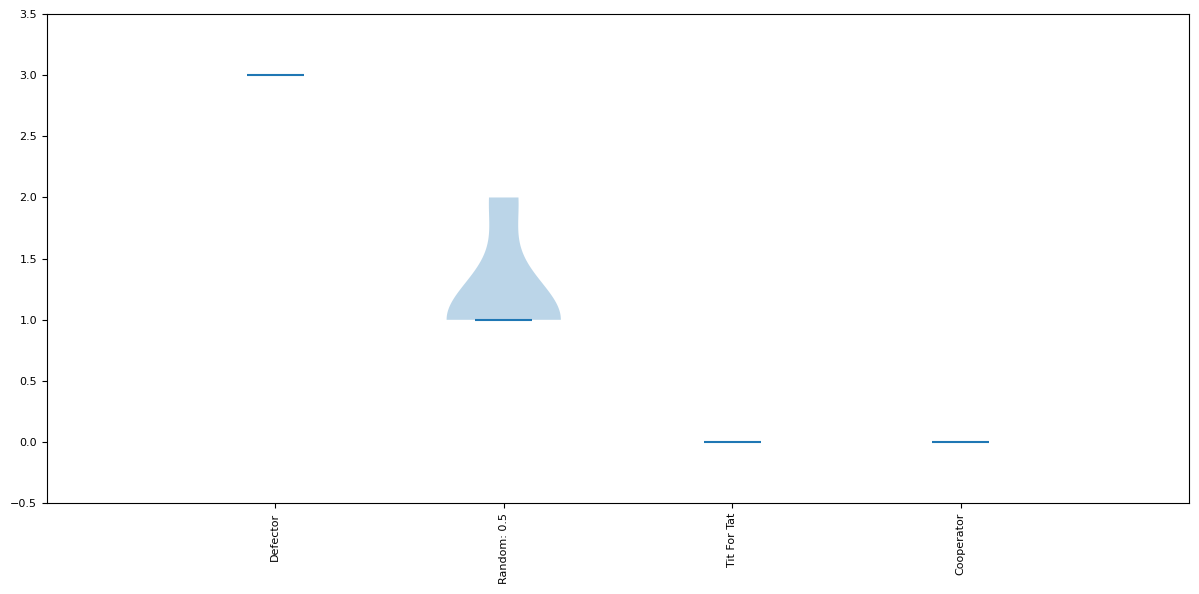

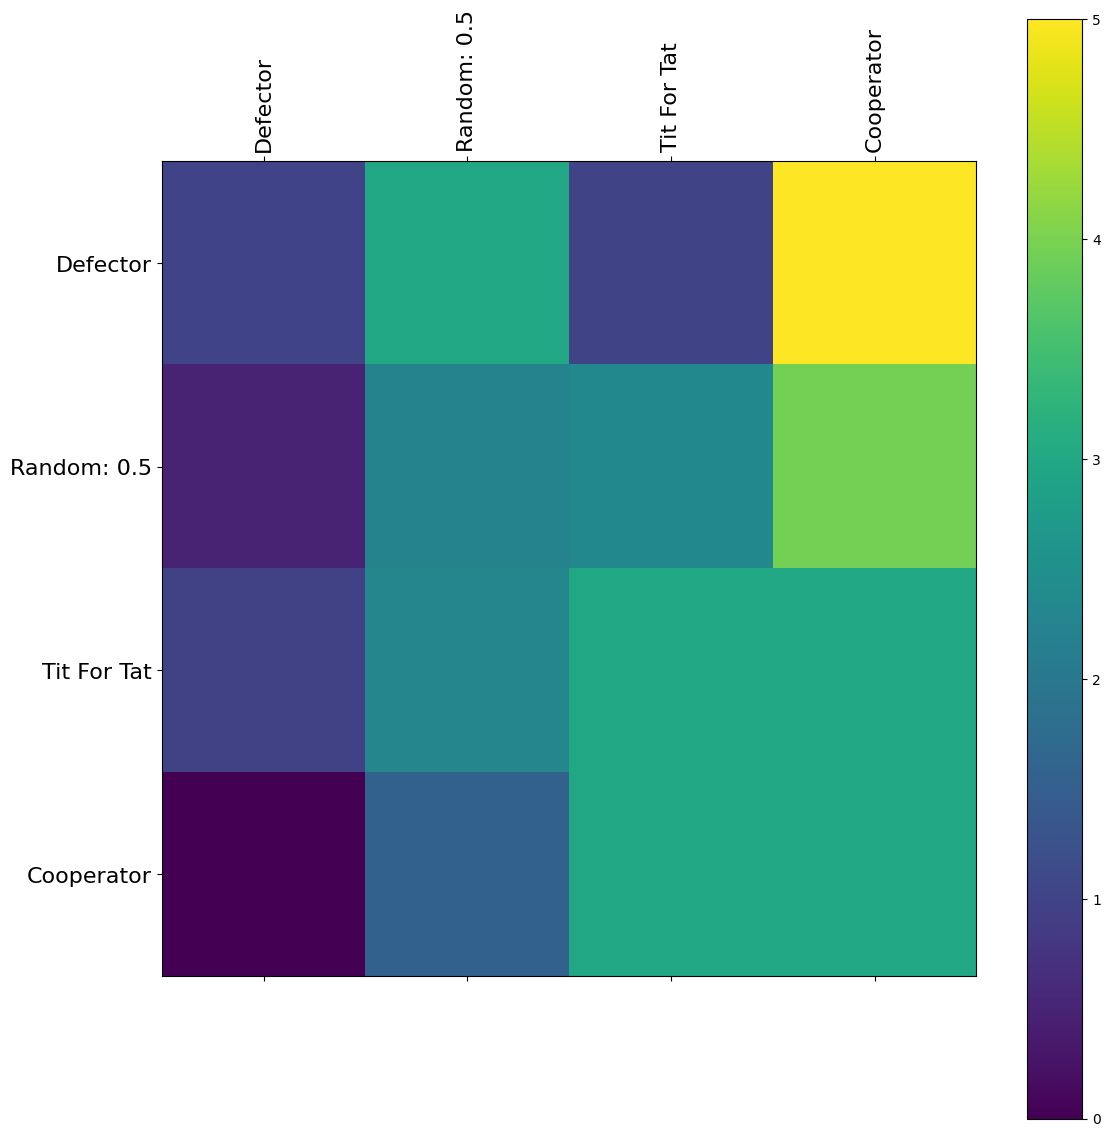

In [7]:
print("Ranking of strategies:")
print(results.ranked_names)

plot = axl.Plot(results)
plot.boxplot()
plot.winplot()
plot.payoff()

The game theory behind ['A House of Dynamite'](https://www.rottentomatoes.com/m/a_house_of_dynamite) from director Kathryn Bigelow

A single, unattributed intercontinental ballistic missile is launched toward the United States.